In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#  matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [51]:
import os
#Задаём рабочую папку    
os.chdir(r"C:\Users\botiy\test\Прогноз_лабораторная")


In [52]:
#читаем данные
df = pd.read_csv('Chicago_hotels.csv',  decimal = ",", sep=';')
df.head()


,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


In [53]:
#Вместо дат поставим номер месяца, а  столбцы x1,x2,x3 уберем, т.к. они не нужны нам.
#Ещё уберу строки с пропущенными значениями.
df_new = df.drop(columns=["date1","date2","x1","x2","x4"])
df_new = df_new[0:112] 
df_new.tail()

,x3
107,46.6
108,45.3
109,50.8
110,55.9
111,58.4


Text(0, 0.5, '% занятых номеров')

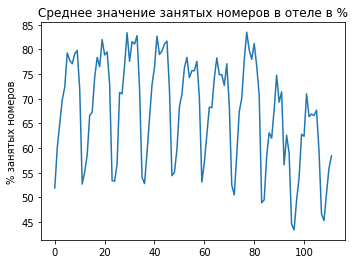

In [54]:
#Строим график для наших данных
df_new=df_new.astype(float)
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df_new['x3'].plot(ax=ax1)
ax1.set_title('Среднее значение занятых номеров в отеле в %')
ax1.set_ylabel('% занятых номеров')



### На графие видно, что график имеет форму параболы, значит тренд параболический. Сезонность аддитивная, т.к. разница между нижней точкой каждого сезона по оси y и верхней остается на одном уровне. Поэтому мы не строим график от логарифма и продолжаем работать с данными в текущем виде.

In [55]:

df_0 = pd.DataFrame((df_new['x3']))
df_0['month_num'] = range(1, len(df_0) + 1)

df_0.head()

,x3,month_num
0,51.9,1
1,60.1,2
2,65.0,3
3,69.8,4
4,72.4,5


In [56]:
#  Индикаторы месяцев

df_0["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*10)[0:len(df_0)]
df_0["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*10)[0:len(df_0)]
df_0["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*10)[0:len(df_0)]
df_0["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*10)[0:len(df_0)]
df_0["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*10)[0:len(df_0)]

In [57]:
df_0.head(14)

,x3,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,51.9,1,1,0,0,0,0,0,0,0,0,0,0,0
1,60.1,2,0,1,0,0,0,0,0,0,0,0,0,0
2,65.0,3,0,0,1,0,0,0,0,0,0,0,0,0
3,69.8,4,0,0,0,1,0,0,0,0,0,0,0,0
4,72.4,5,0,0,0,0,1,0,0,0,0,0,0,0
5,79.3,6,0,0,0,0,0,1,0,0,0,0,0,0
6,77.8,7,0,0,0,0,0,0,1,0,0,0,0,0
7,77.1,8,0,0,0,0,0,0,0,1,0,0,0,0
8,79.1,9,0,0,0,0,0,0,0,0,1,0,0,0
9,79.8,10,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
#Убираем базовый месяц. 
X = df_0.drop(columns=["x3", "m01"])

In [59]:
#  Создаем матрицу (столбец) откликов.
y = df_0['x3']
print(y)

0      51.9
1      60.1
2      65.0
3      69.8
4      72.4
       ... 
107    46.6
108    45.3
109    50.8
110    55.9
111    58.4
Name: x3, Length: 112, dtype: float64


In [60]:
#Создаём модель для нашей полиномиальной регрессии
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

<AxesSubplot:>

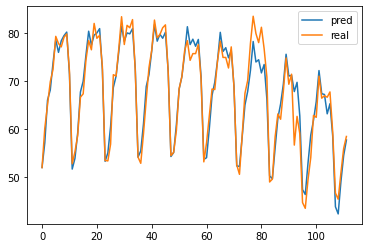

In [61]:
#  Сравним подгонку и наш ряд 


pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [62]:
#Cмотрим на правильность наших действий
pred.head(14)

,pred,real
0,51.924185,51.9
1,57.077700,60.1
2,65.999982,65.0
3,68.110463,69.8
4,73.716385,72.4
5,78.574619,79.3
6,75.959456,77.8
7,78.362013,77.1
8,79.444049,79.1
9,80.189470,79.8


In [63]:
print("Исторические данные за ", len(df), " месяцев")
print("Это составляет ", len(df)//12, " полных лет")
print("И еще ", len(df) % 12, " месяцев.")

Исторические данные за  120  месяцев
Это составляет  10  полных лет
И еще  0  месяцев.


In [64]:
#  Готовим матрицу значений предикторов df_3 
#  для вычисления прогнозов на 8 месяцев вперед
#  Сначала добавляем в нее время (номер месяца)

df_3= pd.DataFrame()

df_3['month_num'] = range(len(df_0)+1, len(df_0)+9)


In [65]:
df_3

,month_num
0,113
1,114
2,115
3,116
4,117
5,118
6,119
7,120


In [66]:
#  Добавляем индикаторы месяцев. Убираем базовый месяц

# df_3["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[4: 12 ]
df_3["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[4: 12 ]
df_3["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[4: 12 ]
df_3["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[4: 12 ]
df_3["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[4: 12 ]
df_3["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[4: 12 ]
df_3["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[4: 12 ]
df_3["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[4: 12 ]
df_3["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[4: 12 ]
df_3["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[4: 12 ]
df_3["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[4: 12 ]

In [67]:
df_3

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,0,0,0,1,0,0,0,0,0,0,0
1,114,0,0,0,0,1,0,0,0,0,0,0
2,115,0,0,0,0,0,1,0,0,0,0,0
3,116,0,0,0,0,0,0,1,0,0,0,0
4,117,0,0,0,0,0,0,0,1,0,0,0
5,118,0,0,0,0,0,0,0,0,1,0,0
6,119,0,0,0,0,0,0,0,0,0,1,0
7,120,0,0,0,0,0,0,0,0,0,0,1


In [68]:
#  Прогноз 
model.predict(df_3)

array([61.34010506, 68.01464176, 62.90871239, 62.41850567, 57.7466774 ,
       60.01758194, 53.53516865, 39.40037537])

In [69]:
#  матрица с подгонкой
pred['forecast'] = np.nan

#  Все хорошо?
pred.head()

,pred,real,forecast
0,51.924185,51.9,NaN
1,57.077700,60.1,NaN
2,65.999982,65.0,NaN
3,68.110463,69.8,NaN
4,73.716385,72.4,NaN


In [70]:


pred_2 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

pred_2.head()

,forecast,real,pred
0,61.340105,NaN,NaN
1,68.014642,NaN,NaN
2,62.908712,NaN,NaN
3,62.418506,NaN,NaN
4,57.746677,NaN,NaN


<AxesSubplot:>

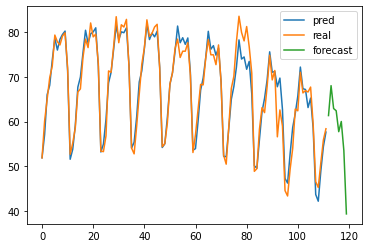

In [71]:
#  объединяем матрицы, задаем новые индексы
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

pred_3.plot()